<a href="https://colab.research.google.com/github/Kalaikujji/kalai/blob/main/breast%20cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.6 MB/s eta 0:00:00


In [5]:
pip install pyttsx3


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,r2_score
plt.style.use ("dark_background")
import pickle
import pyttsx3

In [32]:
data = pd.read_csv('/content/data (1).csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<ipython-input-34-65e17ac704a8>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data['diagnosis'],kde=True,palette='hot')


<Axes: xlabel='diagnosis', ylabel='Count'>

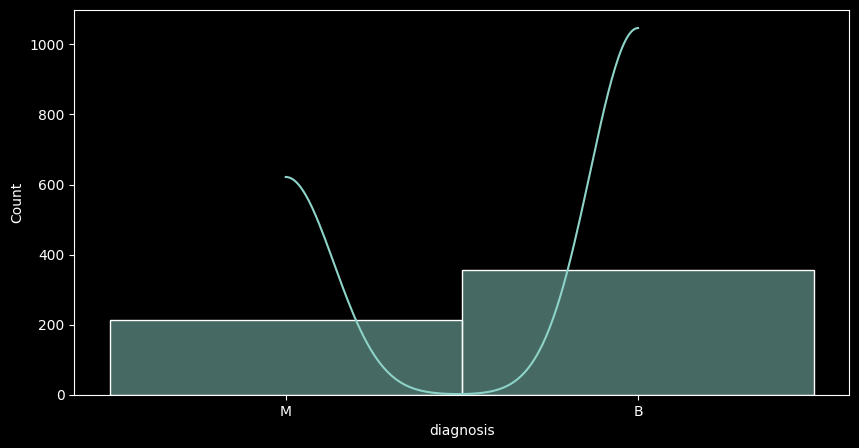

In [34]:
plt.figure(figsize=(10,5))
sns.histplot(data=data['diagnosis'],kde=True,palette='hot')

In [35]:
nan = data.isna()
nan.sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<Axes: >

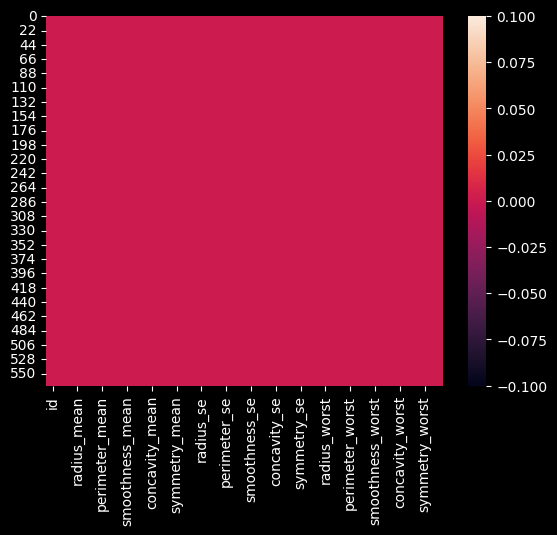

In [36]:
sns.heatmap(nan)

In [37]:
diagnosis = LabelEncoder()
data['diagnosis'] = diagnosis.fit_transform(data['diagnosis'])
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [45]:
data.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [40]:
corr = data.corr()
corr

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


<Axes: >

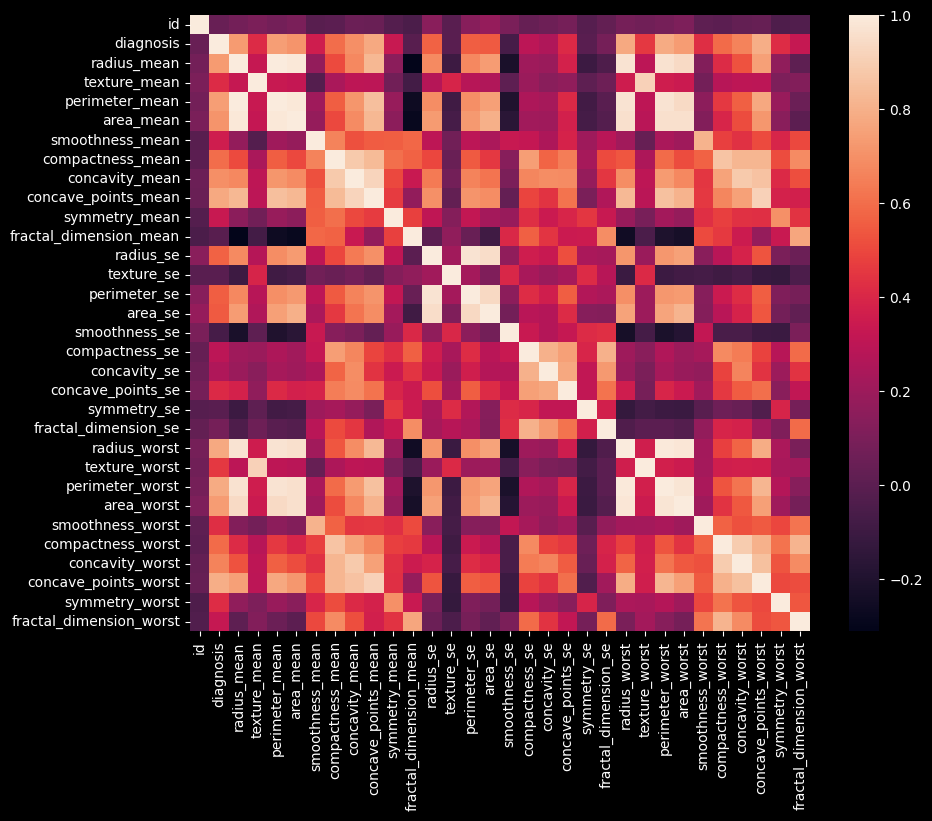

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr)

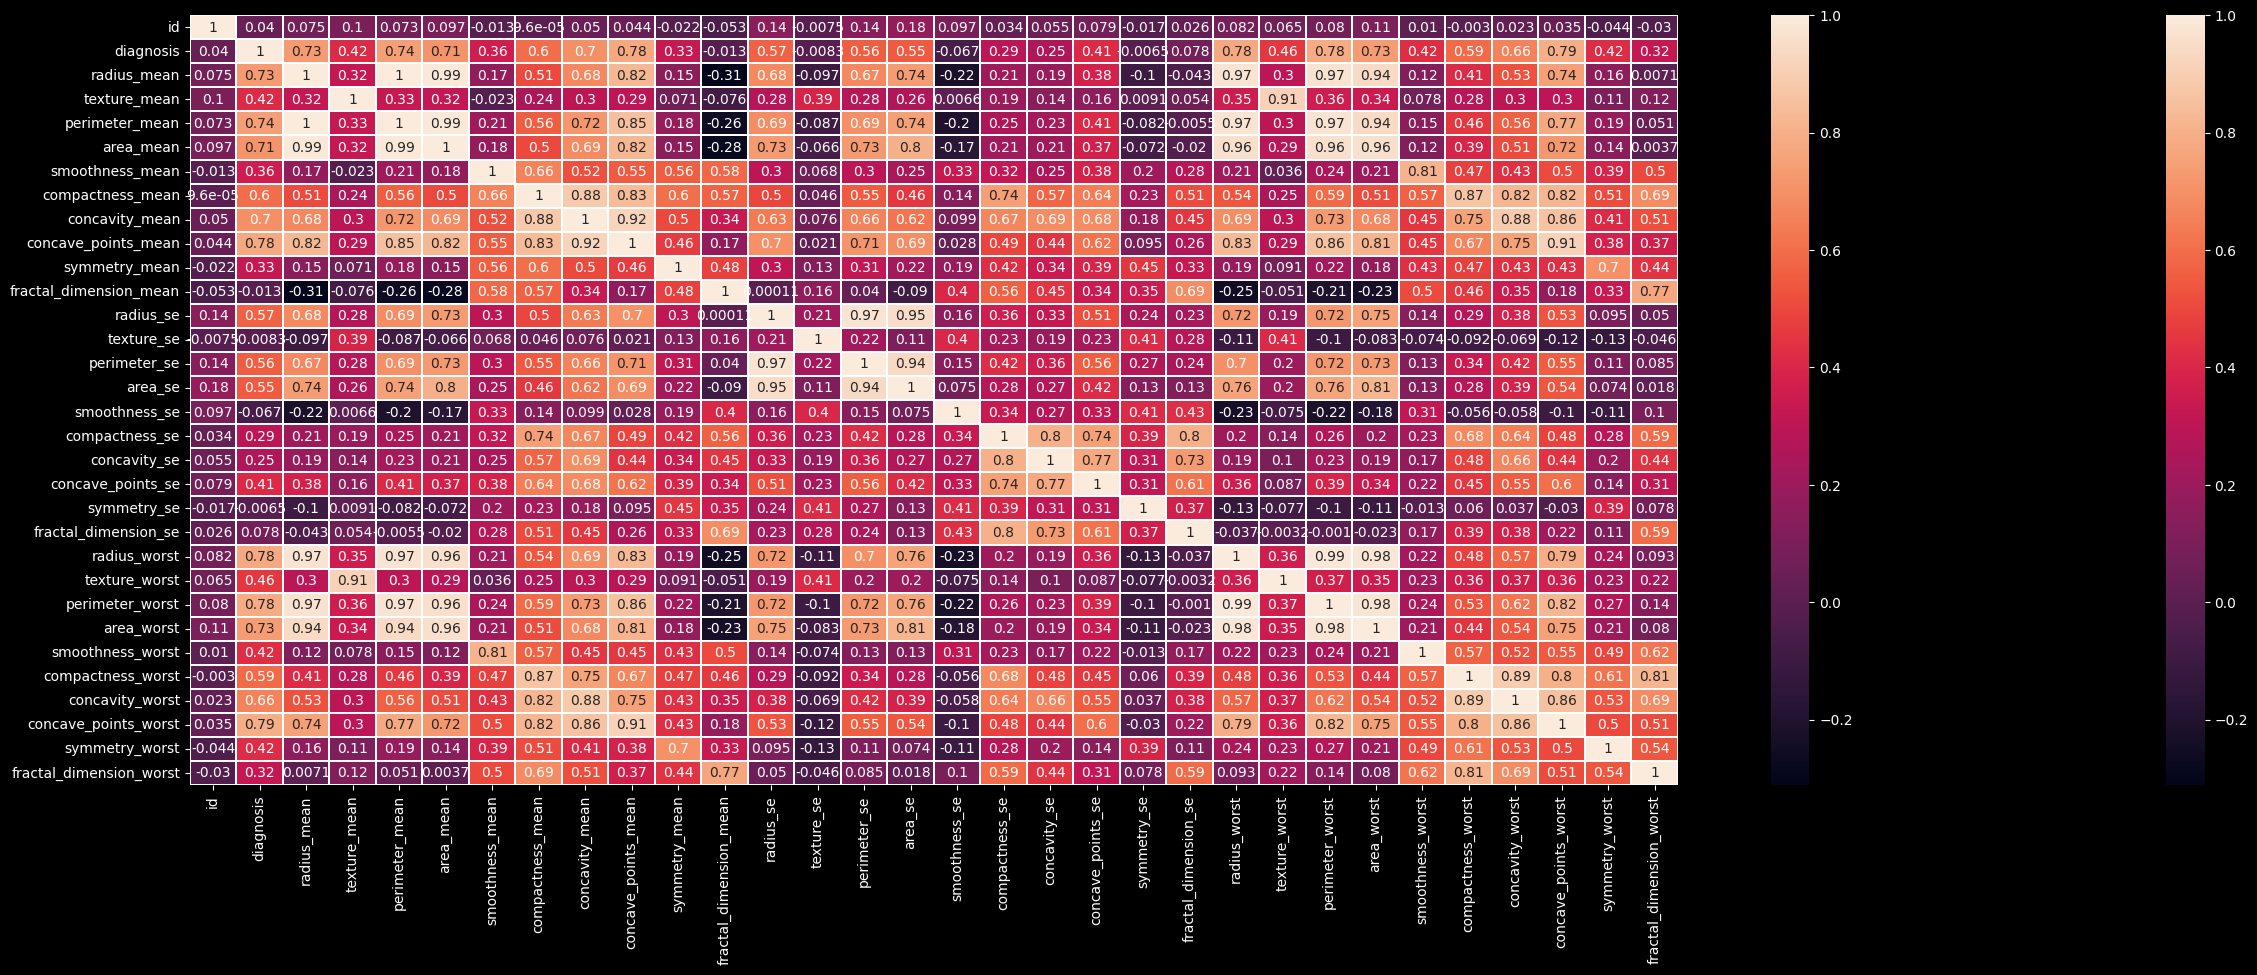

In [48]:
plt.figure(figsize=(30, 10))
sns.heatmap(data.corr())
top_corr_features = data.corr().index
g=sns.heatmap(data[top_corr_features].corr(),annot=True,linewidth=.10,cmap="rocket")

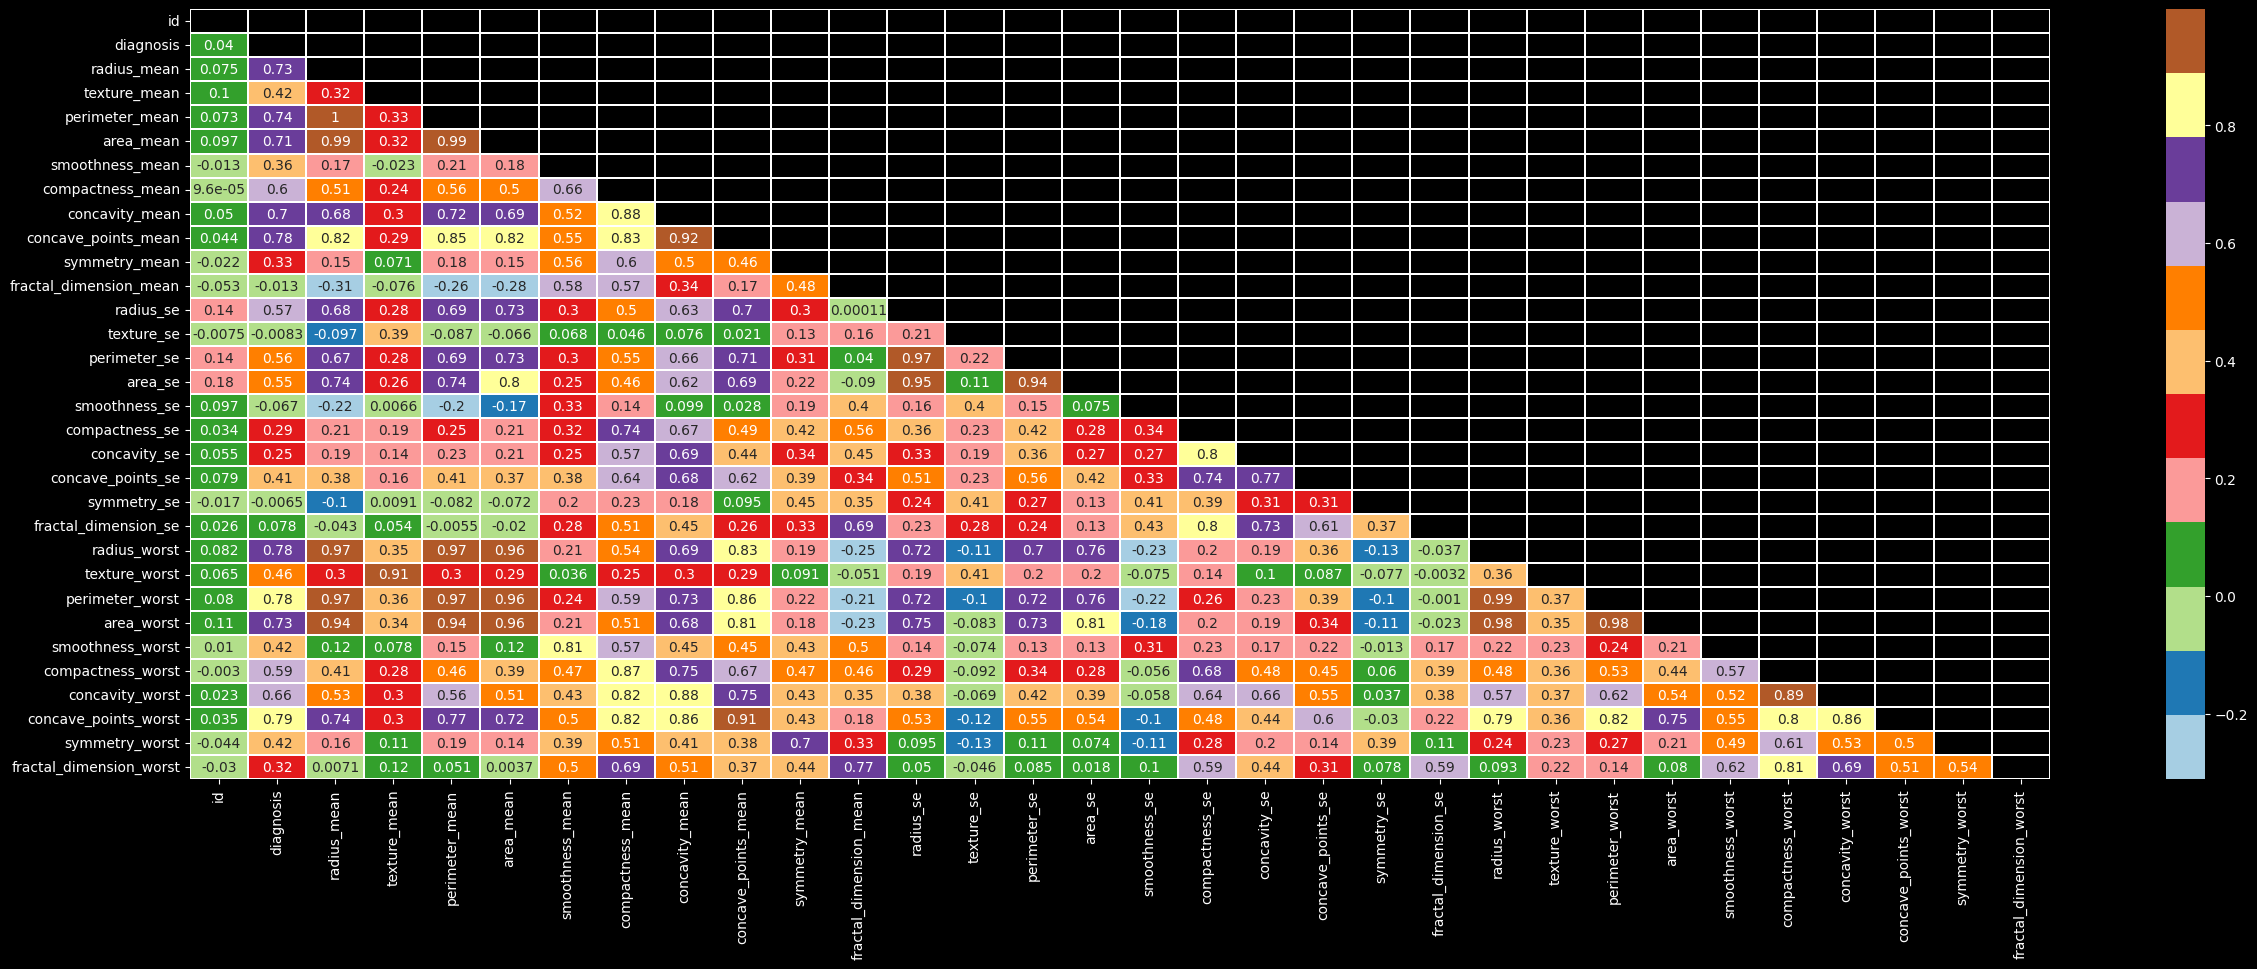

In [50]:
plt.figure(figsize=(30, 10))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, linewidth=.10, mask=matrix, cmap="Paired");

<Axes: ylabel='Count'>

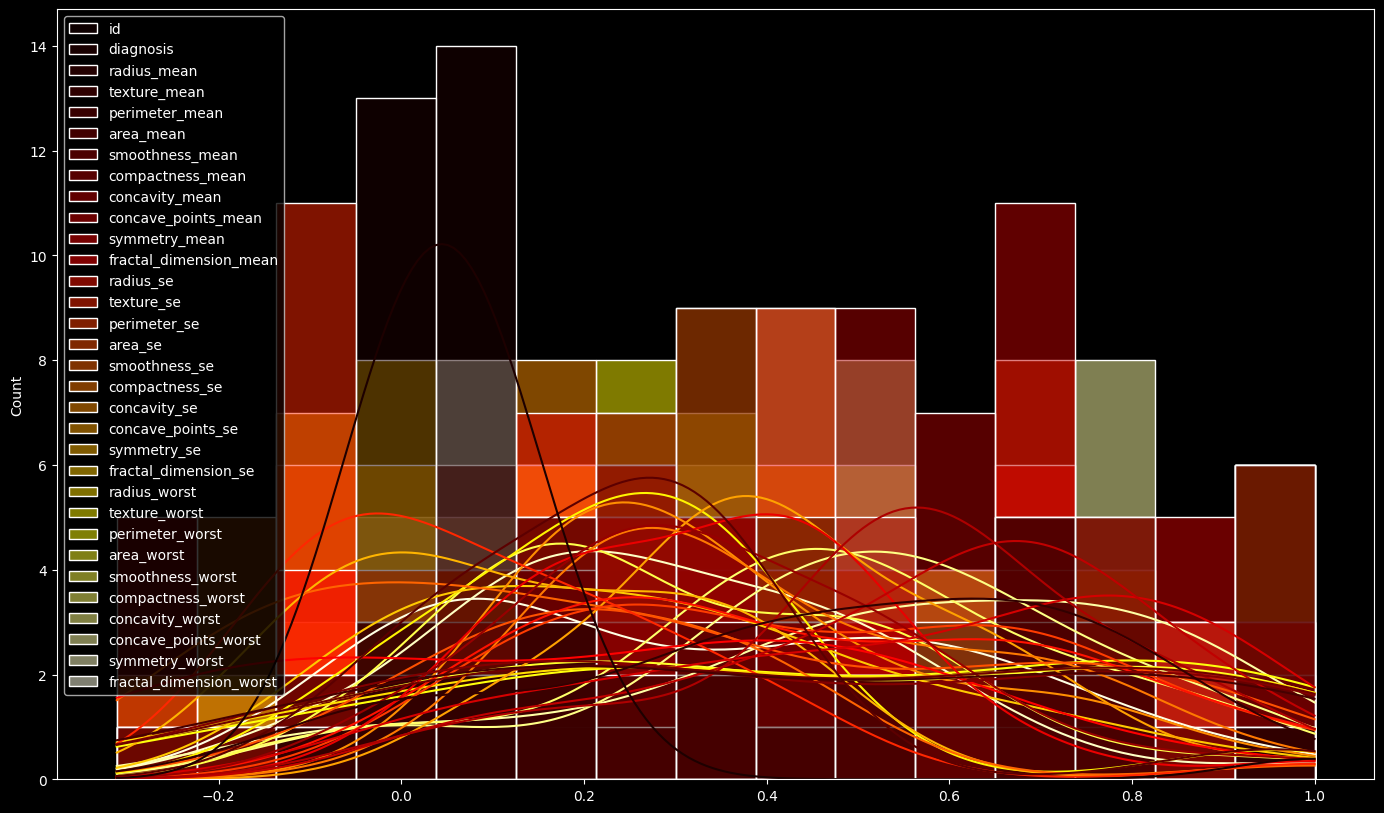

In [51]:
plt.figure(figsize=(17, 10))
sns.histplot(data=corr,kde=True,palette='hot')

In [52]:
n_unique = data.nunique()
n_unique

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave_points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave_points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave_points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [53]:
unique = pd.DataFrame(data.nunique())

<Axes: >

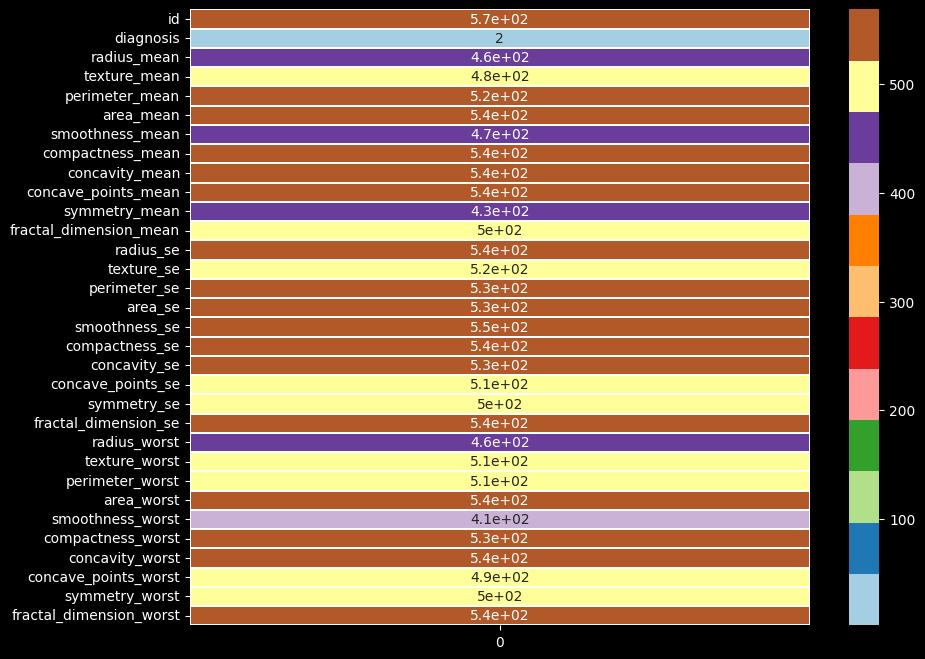

In [55]:
plt.figure(figsize=(10, 8))
sns.heatmap(unique,annot=True, linewidth=.10, cmap="Paired")

<ipython-input-58-084470cd15be>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=n_unique,kde=True,palette='hot')


<Axes: ylabel='Count'>

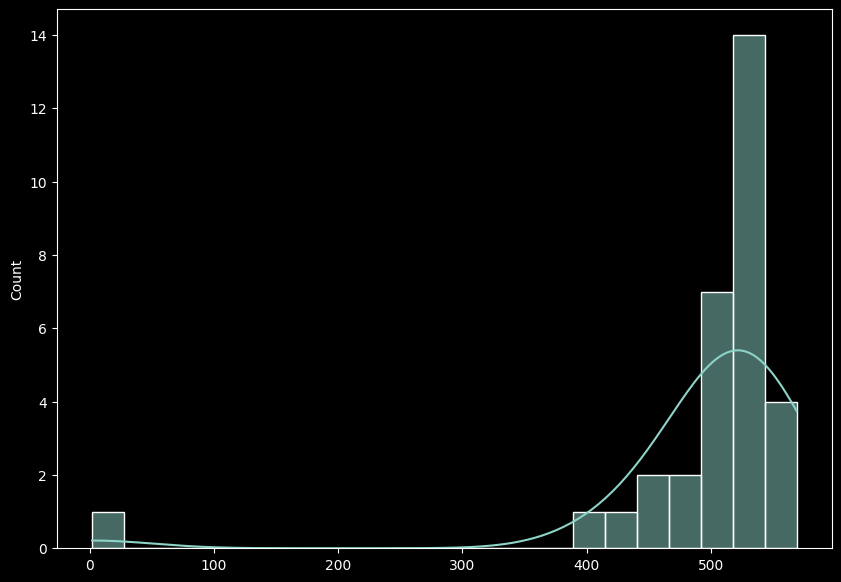

In [58]:
plt.figure(figsize=(10, 7))
sns.histplot(data=n_unique,kde=True,palette='hot')

<Axes: >

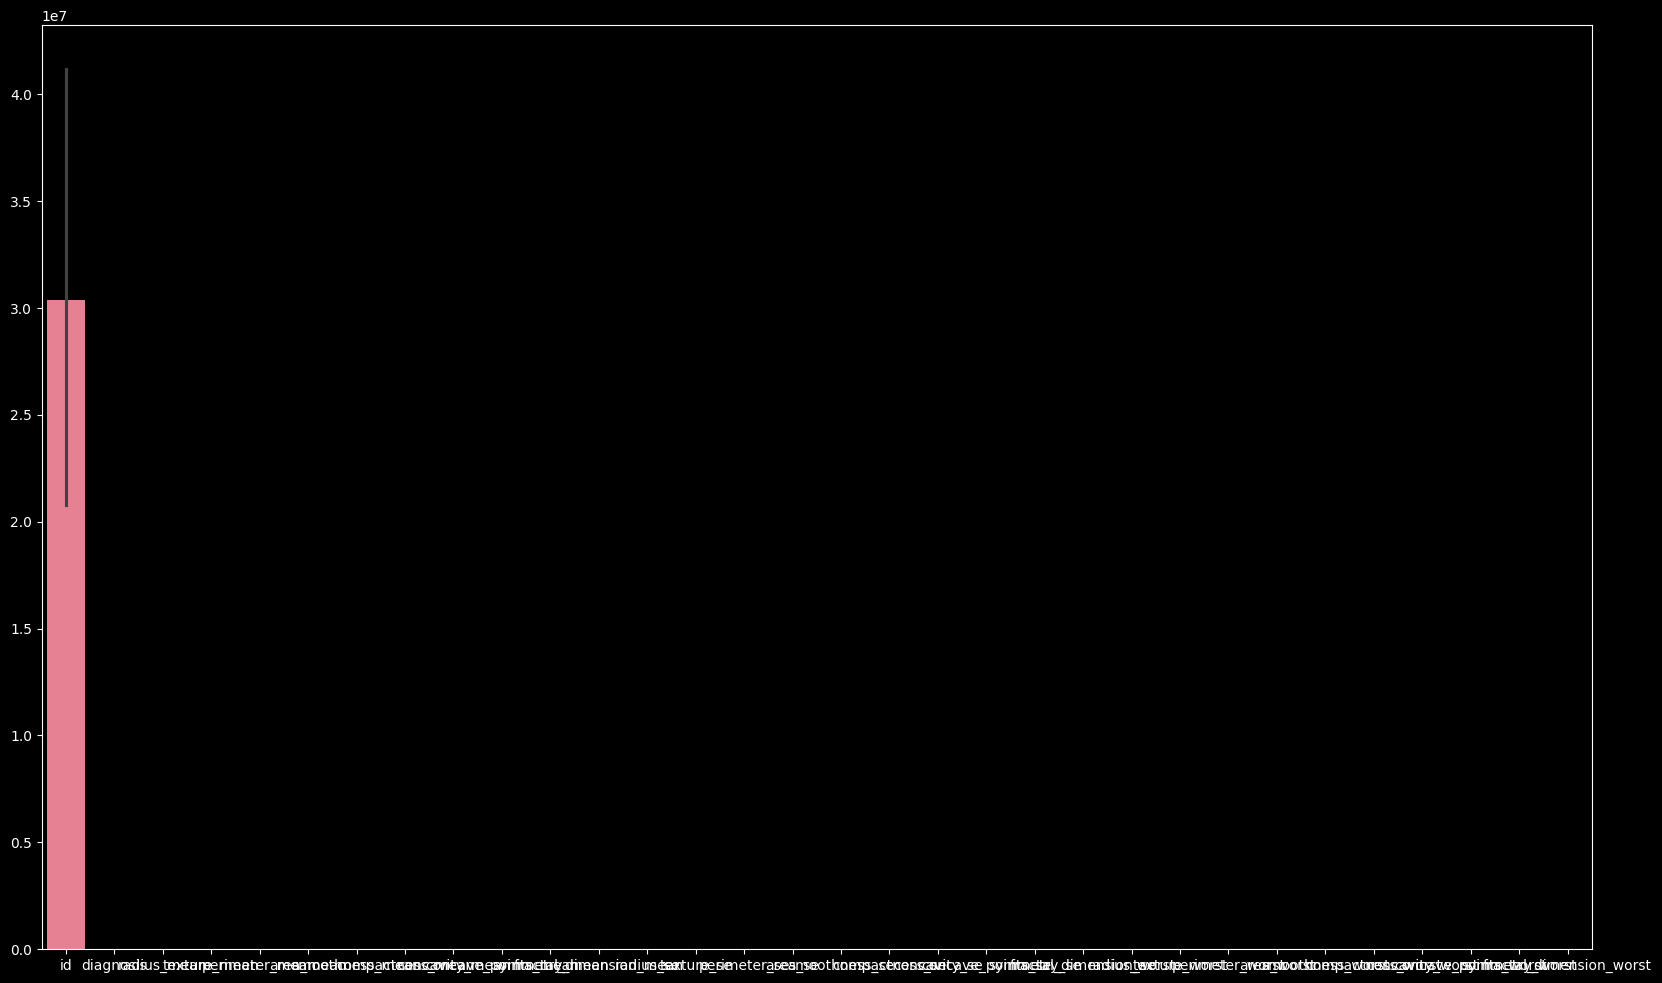

In [67]:
plt.figure(figsize=(20, 12))
sns.barplot(data=data)

In [68]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [69]:
y = data.iloc[:,1].values   #lables
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [70]:
x = data.drop('diagnosis',1) # 1 represent column bases, 0 represent row based
x

<ipython-input-70-bb33396ed0f1>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = data.drop('diagnosis',1) # 1 represent column bases, 0 represent row based


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [71]:
x = np.array(x)
x

array([[8.4230200e+05, 1.7990000e+01, 1.0380000e+01, ..., 2.6540000e-01,
        4.6010000e-01, 1.1890000e-01],
       [8.4251700e+05, 2.0570000e+01, 1.7770000e+01, ..., 1.8600000e-01,
        2.7500000e-01, 8.9020000e-02],
       [8.4300903e+07, 1.9690000e+01, 2.1250000e+01, ..., 2.4300000e-01,
        3.6130000e-01, 8.7580000e-02],
       ...,
       [9.2695400e+05, 1.6600000e+01, 2.8080000e+01, ..., 1.4180000e-01,
        2.2180000e-01, 7.8200000e-02],
       [9.2724100e+05, 2.0600000e+01, 2.9330000e+01, ..., 2.6500000e-01,
        4.0870000e-01, 1.2400000e-01],
       [9.2751000e+04, 7.7600000e+00, 2.4540000e+01, ..., 0.0000000e+00,
        2.8710000e-01, 7.0390000e-02]])

In [72]:
SC = StandardScaler()
x[:,0:5] = SC.fit_transform(x[:,0:5])
x[:,10:14] = SC.fit_transform(x[:,10:14])
x

array([[-0.23640517,  1.09706398, -2.07333501, ...,  0.2654    ,
         0.4601    ,  0.1189    ],
       [-0.23640344,  1.82982061, -0.35363241, ...,  0.186     ,
         0.275     ,  0.08902   ],
       [ 0.43174109,  1.57988811,  0.45618695, ...,  0.243     ,
         0.3613    ,  0.08758   ],
       ...,
       [-0.23572747,  0.70228425,  2.0455738 , ...,  0.1418    ,
         0.2218    ,  0.0782    ],
       [-0.23572517,  1.83834103,  2.33645719, ...,  0.265     ,
         0.4087    ,  0.124     ],
       [-0.24240586, -1.80840125,  1.22179204, ...,  0.        ,
         0.2871    ,  0.07039   ]])

In [73]:
df_x = pd.DataFrame(x,columns = ['id','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst'])
df_x

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.236405,1.097064,-2.073335,1.269934,0.984375,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,-0.236403,1.829821,-0.353632,1.685955,1.908708,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0.431741,1.579888,0.456187,1.566503,1.558884,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0.432121,-0.768909,0.253732,-0.592687,-0.764464,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0.432201,1.750297,-1.151816,1.776573,1.826229,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.235732,2.110995,0.721473,2.060786,2.343856,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,-0.235730,1.704854,2.085134,1.615931,1.723842,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,-0.235727,0.702284,2.045574,0.672676,0.577953,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,-0.235725,1.838341,2.336457,1.982524,1.735218,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [74]:
pca = PCA()
x = pca.fit_transform(x)
x

array([[ 1.14590746e+03,  3.84787432e+01, -1.10170827e+01, ...,
        -1.26338335e-03,  2.03048331e-03,  7.30408068e-04],
       [ 1.07654985e+03, -3.49086429e+01,  1.46481426e+01, ...,
        -6.49246449e-04,  6.63723706e-04, -1.06872994e-03],
       [ 8.31414663e+02,  1.77649760e-01,  3.23588069e+00, ...,
         1.53899302e-04, -7.89231894e-04,  3.98767797e-04],
       ...,
       [ 2.44199857e+02, -8.26619681e+00, -6.57718373e+00, ...,
        -1.05120438e-03,  5.22925802e-04, -2.67925108e-04],
       [ 9.44400644e+02, -1.72824471e+01, -2.37117854e+01, ...,
         3.00043274e-03, -7.57162730e-04,  1.23118885e-03],
       [-6.13839987e+02,  1.92544330e+01,  9.09993500e+00, ...,
        -9.36913622e-04,  9.18581130e-05,  1.40643504e-03]])

<Axes: >

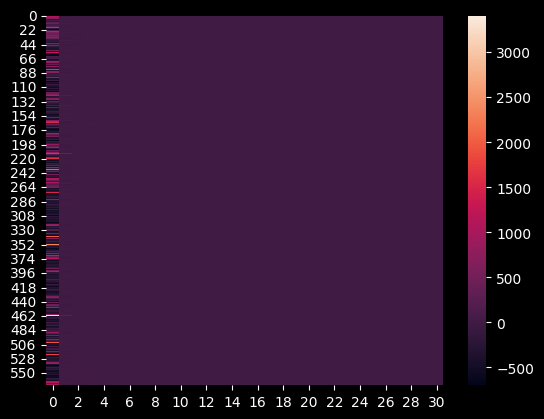

In [75]:
sns.heatmap(x)

In [76]:
x_train,x_test,y_train,y_test = train_test_split ( x , y , test_size = 0.2 , random_state = 0)

In [77]:
x_test

array([[-3.61152964e+01, -5.07009835e+00, -8.53389241e+00, ...,
        -1.38825749e-03,  9.47419792e-04, -4.19563534e-04],
       [-2.49118982e+02, -6.85882138e+00, -2.89483113e-01, ...,
        -5.12546556e-04, -1.04237429e-03,  3.67828191e-04],
       [-1.92973252e+02, -8.44720650e+00,  1.85408510e+00, ...,
         8.05914119e-04, -8.81248379e-05,  2.59662548e-05],
       ...,
       [ 5.99210191e+02, -2.68329388e+01, -1.24291299e+00, ...,
         4.97990311e-04, -1.24258391e-03,  5.17034629e-04],
       [ 6.13901819e+02, -1.26250421e+01,  1.82428022e+00, ...,
         3.77400156e-04, -9.14555643e-04, -5.64595389e-05],
       [-2.38242363e+01, -4.06843808e+00, -2.07683929e+00, ...,
         1.61287361e-04,  2.40414495e-04, -1.06440833e-03]])

In [78]:
DF_x_test = pd.DataFrame(x_test,columns = ['id','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst'])
DF_x_test

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-36.115296,-5.070098,-8.533892,1.778058,-1.020411,0.805861,-1.035868,-0.250011,0.061873,-0.100486,...,-0.001965,-0.000313,-0.002812,-0.002514,-0.000152,0.001625,0.000604,-0.001388,0.000947,-0.000420
1,-249.118982,-6.858821,-0.289483,9.576394,1.022816,-0.845438,-0.437257,0.234984,0.073195,0.153559,...,-0.002468,0.002704,-0.001349,0.000902,0.001780,0.002365,0.000506,-0.000513,-0.001042,0.000368
2,-192.973252,-8.447206,1.854085,-5.796019,0.893750,-0.650560,-0.230436,0.086028,-0.049889,0.174691,...,-0.004604,-0.001035,0.001640,0.002930,0.002189,-0.000055,0.001156,0.000806,-0.000088,0.000026
3,-62.018951,-15.926265,-0.619562,-1.058813,0.896758,-0.587849,-0.608655,-0.164241,0.094949,0.001530,...,-0.006683,-0.007602,0.003306,0.003176,-0.003452,-0.000191,0.000607,0.000526,0.000817,-0.000239
4,-336.455259,-4.076227,4.107701,-0.532394,-0.034505,-0.775959,2.086823,0.134423,0.151846,0.504738,...,-0.014548,0.001485,0.003182,-0.009024,-0.002633,0.000361,0.005294,0.002163,-0.003028,-0.000374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,141.847506,8.602310,-6.120691,0.929748,4.385890,4.798695,2.339369,0.930872,-0.301128,0.341584,...,0.011241,-0.009668,-0.010793,-0.007268,0.001509,-0.002422,-0.005063,0.011493,0.012073,0.000236
110,-257.082814,4.930515,-0.783727,-3.181135,-0.275940,0.047373,-0.250131,0.170195,0.107050,-0.278423,...,0.012487,0.004719,0.006265,-0.000796,0.004847,-0.000335,-0.001626,-0.000678,0.000534,0.000125
111,599.210191,-26.832939,-1.242913,-4.258873,-0.006314,-0.260483,0.443195,0.790490,0.308053,0.562858,...,0.003184,-0.001554,-0.005597,-0.000748,0.000163,0.004989,0.004069,0.000498,-0.001243,0.000517
112,613.901819,-12.625042,1.824280,-1.819734,0.115481,-0.380087,-0.119646,0.500135,0.182228,-0.038944,...,0.000909,-0.006444,-0.003360,-0.004545,-0.000095,0.005084,-0.002143,0.000377,-0.000915,-0.000056


In [79]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred1 = LR.predict(x_test)
print(y_pred1)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 1 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy = 93.85964912280701 %


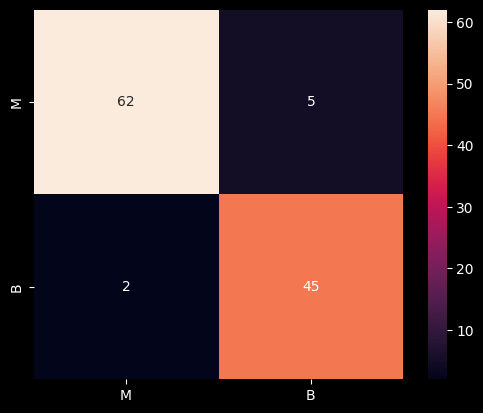

In [80]:
cm = confusion_matrix(y_test, y_pred1)
%matplotlib inline
# Plot confusion matrix
class_names = ['M','B']
df_cm = pd.DataFrame(cm, index = [i for i in class_names], columns = [i for i in class_names])
sns.heatmap(df_cm, annot = True)
cmap = plt.cm.Blues
plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
# Model Accuracy
acc = accuracy_score(y_test, y_pred1)
print("Model Accuracy =",acc*100,"%")

In [81]:
svc = SVC()
svc.fit(x_train,y_train)
y_pred2 = svc.predict(x_test)
print(y_pred2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]


Model Accuracy = 94.73684210526315 %


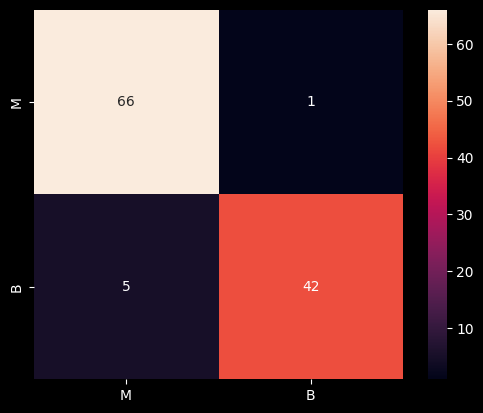

In [82]:
cm = confusion_matrix(y_test, y_pred2)
%matplotlib inline
# Plot confusion matrix
class_names = ['M','B']
df_cm = pd.DataFrame(cm, index = [i for i in class_names], columns = [i for i in class_names])
sns.heatmap(df_cm, annot = True)
cmap = plt.cm.Blues
plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
# Model Accuracy
acc = accuracy_score(y_test, y_pred2)
print("Model Accuracy =",acc*100,"%")

In [83]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
y_pred3 = DTC.predict(x_test)
print(y_pred3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0
 1 1 1]


Model Accuracy = 91.22807017543859 %


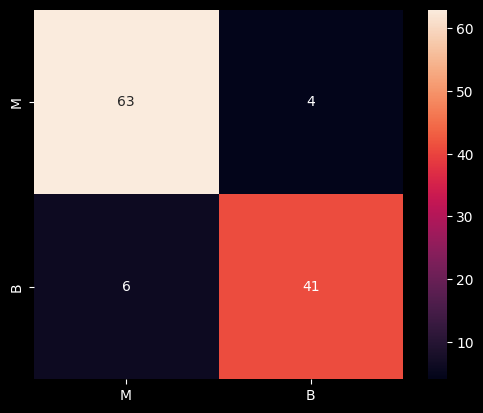

In [85]:
cm = confusion_matrix(y_test, y_pred3)
%matplotlib inline
# Plot confusion matrix
class_names = ['M','B']
df_cm = pd.DataFrame(cm, index = [i for i in class_names], columns = [i for i in class_names])
sns.heatmap(df_cm, annot = True)
cmap = plt.cm.Blues
plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
# Model Accuracy
acc = accuracy_score(y_test, y_pred3)
print("Model Accuracy =",acc*100,"%")

In [86]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
y_pred4 = RFC.predict(x_test)
print(y_pred4)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]


Model Accuracy = 95.6140350877193 %


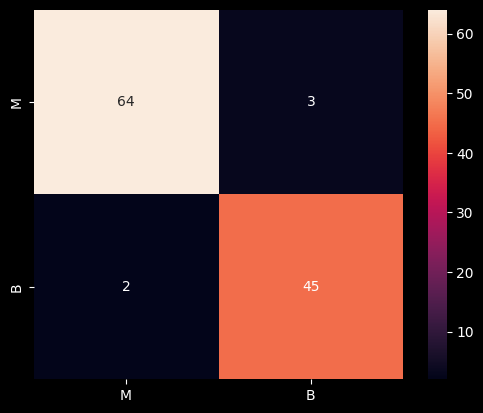

In [87]:
cm = confusion_matrix(y_test, y_pred4)
%matplotlib inline
# Plot confusion matrix
class_names = ['M','B']
df_cm = pd.DataFrame(cm, index = [i for i in class_names], columns = [i for i in class_names])
sns.heatmap(df_cm, annot = True)
cmap = plt.cm.Blues
plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
# Model Accuracy
acc = accuracy_score(y_test, y_pred4)
print("Model Accuracy =",acc*100,"%")

In [88]:
KNC = KNeighborsClassifier()
KNC.fit(x_train,y_train)
y_pred5 = KNC.predict(x_test)
print(y_pred5)

[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]


Model Accuracy = 94.73684210526315 %


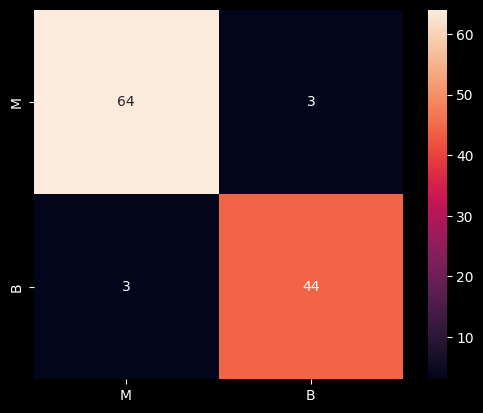

In [89]:
cm = confusion_matrix(y_test, y_pred5)
%matplotlib inline
# Plot confusion matrix
class_names = ['M','B']
df_cm = pd.DataFrame(cm, index = [i for i in class_names], columns = [i for i in class_names])
sns.heatmap(df_cm, annot = True)
cmap = plt.cm.Blues
plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
# Model Accuracy
acc = accuracy_score(y_test, y_pred5)
print("Model Accuracy =",acc*100,"%")

In [90]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic",learning_rate=0.01,max_depth=3,n_estimators=100,subsample=0.9,colsample_bytree=0.9)
xgb_model.fit(x_train,y_train)
y_pred6 = xgb_model.predict(x_test)
print(y_pred6)

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]


Model Accuracy = 96.49122807017544 %


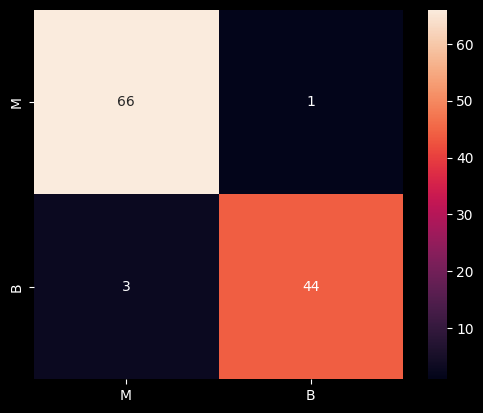

In [91]:
cm = confusion_matrix(y_test, y_pred6)
%matplotlib inline
# Plot confusion matrix
class_names = ['M','B']
df_cm = pd.DataFrame(cm, index = [i for i in class_names], columns = [i for i in class_names])
sns.heatmap(df_cm, annot = True)
cmap = plt.cm.Blues
plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
# Model Accuracy
acc = accuracy_score(y_test, y_pred6)
print("Model Accuracy =",acc*100,"%")

In [92]:
CBC = CatBoostClassifier()
CBC.fit(x_train,y_train)
y_pred7 = CBC.predict(x_test)
print(y_pred7)

Learning rate set to 0.00736
0:	learn: 0.6826737	total: 78ms	remaining: 1m 17s
1:	learn: 0.6730854	total: 96.1ms	remaining: 47.9s
2:	learn: 0.6639531	total: 113ms	remaining: 37.7s
3:	learn: 0.6545326	total: 131ms	remaining: 32.7s
4:	learn: 0.6465407	total: 149ms	remaining: 29.6s
5:	learn: 0.6377575	total: 166ms	remaining: 27.5s
6:	learn: 0.6284847	total: 183ms	remaining: 26s
7:	learn: 0.6189753	total: 211ms	remaining: 26.1s
8:	learn: 0.6095633	total: 230ms	remaining: 25.3s
9:	learn: 0.6026612	total: 247ms	remaining: 24.5s
10:	learn: 0.5967673	total: 264ms	remaining: 23.7s
11:	learn: 0.5900318	total: 281ms	remaining: 23.1s
12:	learn: 0.5840955	total: 296ms	remaining: 22.5s
13:	learn: 0.5773634	total: 314ms	remaining: 22.1s
14:	learn: 0.5694280	total: 325ms	remaining: 21.4s
15:	learn: 0.5608626	total: 336ms	remaining: 20.6s
16:	learn: 0.5545655	total: 346ms	remaining: 20s
17:	learn: 0.5486436	total: 357ms	remaining: 19.5s
18:	learn: 0.5427654	total: 367ms	remaining: 18.9s
19:	learn: 0.53

Model Accuracy = 98.24561403508771 %


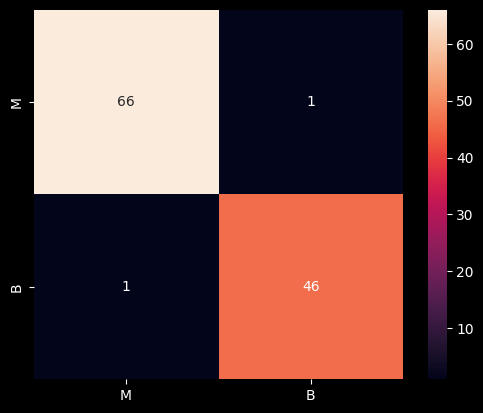

In [93]:
cm = confusion_matrix(y_test, y_pred7)
%matplotlib inline
# Plot confusion matrix
class_names = ['M','B']
df_cm = pd.DataFrame(cm, index = [i for i in class_names], columns = [i for i in class_names])
sns.heatmap(df_cm, annot = True)
cmap = plt.cm.Blues
plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
# Model Accuracy
acc = accuracy_score(y_test, y_pred7)
print("Model Accuracy =",acc*100,"%")

In [96]:
# Data Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1)) #This is a default range
X_train_sc = scaler.fit_transform(x_train)
X_test_sc = scaler.fit_transform(x_test)

In [97]:
LR = LogisticRegression()
LR.fit(X_train_sc,y_train)
y_pred11 = LR.predict(X_test_sc)
print(y_pred11)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 1 1 0]


Model Accuracy = 97.36842105263158 %


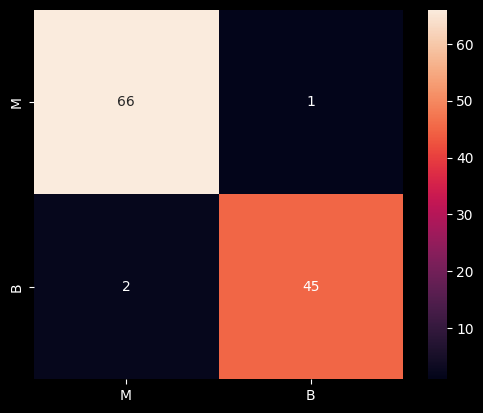

In [98]:
cm = confusion_matrix(y_test, y_pred11)
%matplotlib inline
# Plot confusion matrix
class_names = ['M','B']
df_cm = pd.DataFrame(cm, index = [i for i in class_names], columns = [i for i in class_names])
sns.heatmap(df_cm, annot = True)
cmap = plt.cm.Blues
plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
# Model Accuracy
acc = accuracy_score(y_test, y_pred11)
print("Model Accuracy =",acc*100,"%")

In [100]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train_sc,y_train)
y_pred13 = DTC.predict(X_test_sc)
print(y_pred13)

[1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 0]


Model Accuracy = 63.1578947368421 %


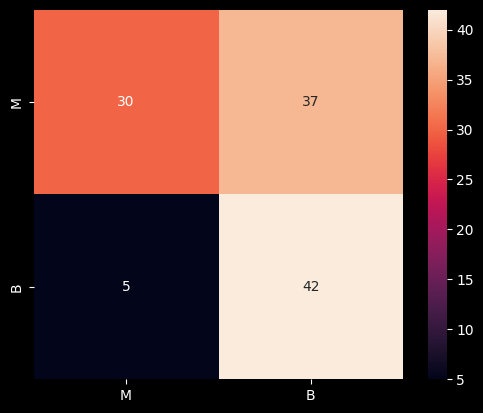

In [102]:
cm = confusion_matrix(y_test, y_pred13)
%matplotlib inline
# Plot confusion matrix
class_names = ['M','B']
df_cm = pd.DataFrame(cm, index = [i for i in class_names], columns = [i for i in class_names])
sns.heatmap(df_cm, annot = True)
cmap = plt.cm.Blues
plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
# Model Accuracy
acc = accuracy_score(y_test, y_pred13)
print("Model Accuracy =",acc*100,"%")

In [103]:
# training
RFC = RandomForestClassifier()
RFC.fit(X_train_sc,y_train)
# testing
y_pred14 = RFC.predict(X_test_sc)
print(y_pred14)
# Model Evaluation

[1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1
 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1
 1 1 1]


Model Accuracy = 64.91228070175438 %


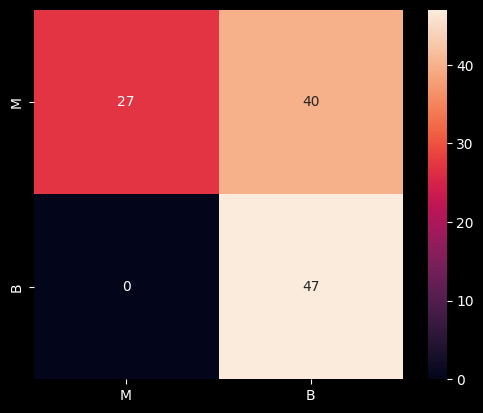

In [104]:
cm = confusion_matrix(y_test, y_pred14)
%matplotlib inline
# Plot confusion matrix
class_names = ['M','B']
df_cm = pd.DataFrame(cm, index = [i for i in class_names], columns = [i for i in class_names])
sns.heatmap(df_cm, annot = True)
cmap = plt.cm.Blues
plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
# Model Accuracy
acc = accuracy_score(y_test, y_pred14)
print("Model Accuracy =",acc*100,"%")

([<matplotlib.patches.Wedge at 0x7b8f4038d780>,
 [Text(-0.9212808152346589, -0.6010338255710428, 'Accuracy'),
  Text(0.9212807589618072, 0.6010339118275746, 'Error')],
 [Text(-0.5025168083098138, -0.32783663212965963, '68%'),
  Text(0.5025167776155312, 0.327836679178677, '32%')])

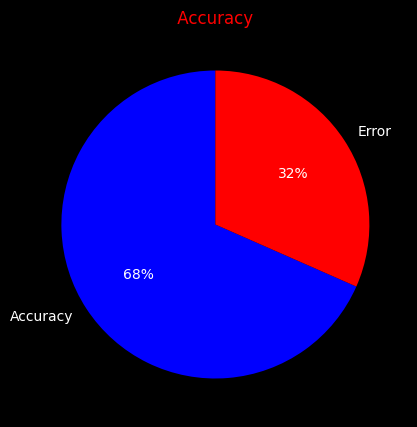

In [105]:

plt.figure(figsize=(10,5))
data = [0.684,0.316]
names = ['Accuracy','Error']
plt.title (' Accuracy ',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)

In [106]:
# training
KNC = KNeighborsClassifier()
KNC.fit(X_train_sc,y_train)
# testing
y_pred = KNC.predict(X_test_sc)
print(y_test)
print(y_pred)
# Model Evaluation
cm = confusion_matrix(y_test, y_pred)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0]


Model Accuracy = 85.08771929824562 %


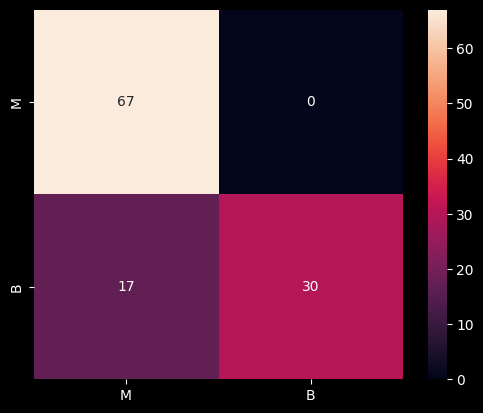

In [107]:
%matplotlib inline
# Plot confusion matrix
class_names = ['M','B']
df_cm = pd.DataFrame(cm, index = [i for i in class_names], columns = [i for i in class_names])
sns.heatmap(df_cm, annot = True)
cmap = plt.cm.Blues
plt.imshow(cm, interpolation = 'nearest', cmap = cmap)

# Model Accuracy
acc = accuracy_score(y_test, y_pred)
print("Model Accuracy =",acc*100,"%")

([<matplotlib.patches.Wedge at 0x7b8f403bb7c0>,
 [Text(-0.49938947630209474, -0.9801072140121813, 'Accuracy'),
  Text(0.49938938453783266, 0.980107260768394, 'Error')],
 [Text(-0.27239425980114257, -0.5346039349157352, '85%'),
  Text(0.2723942097479087, 0.534603960419124, '15%')])

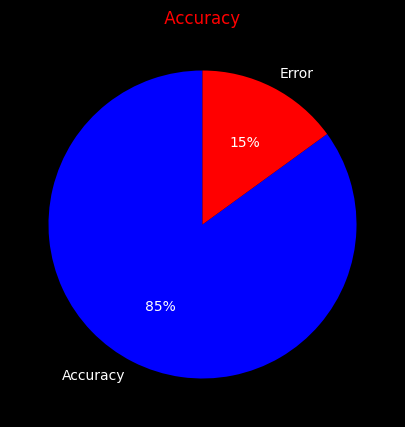

In [108]:
plt.figure(figsize=(10,5))
data = [0.85,0.15]
names = ['Accuracy','Error']
plt.title (' Accuracy ',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)

In [110]:
# training
classifier = SVC(kernel = 'linear', random_state=0)
classifier.fit(X_train_sc,y_train)
# testing
y_pred = classifier.predict(X_test_sc)
print(y_test)
print(y_pred)
# Model Evaluation
cm = confusion_matrix(y_test, y_pred)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 1 0]


Model Accuracy = 95.6140350877193 %


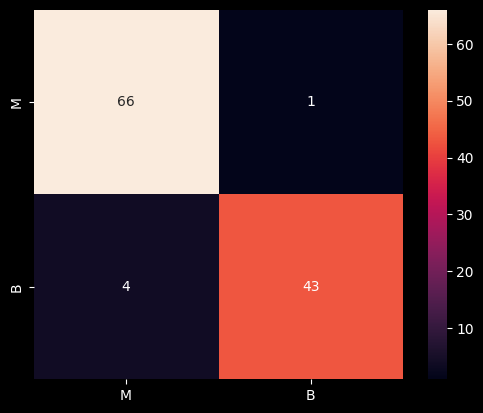

In [111]:
%matplotlib inline
# Plot confusion matrix
class_names = ['M','B']
df_cm = pd.DataFrame(cm, index = [i for i in class_names], columns = [i for i in class_names])
sns.heatmap(df_cm, annot = True)
cmap = plt.cm.Blues
plt.imshow(cm, interpolation = 'nearest', cmap = cmap)

# Model Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("Model Accuracy =",acc*100,"%")

([<matplotlib.patches.Wedge at 0x7b8f4038ee00>,
 [Text(-0.15156942094410547, -1.0895075541888954, 'Accuracy'),
  Text(0.15156952295116397, 1.0895075399979373, 'Error')],
 [Text(-0.08267422960587571, -0.5942768477393974, '96%'),
  Text(0.08267428524608943, 0.5942768399988748, '4%')])

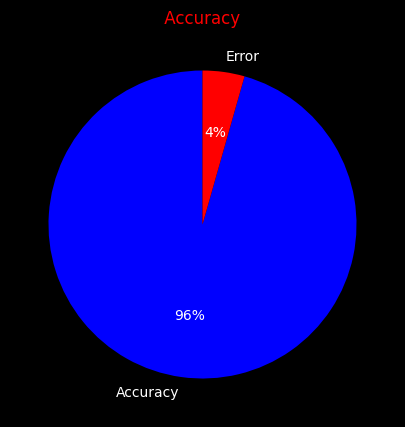

In [112]:
plt.figure(figsize=(10,5))
data = [0.956,0.044]
names = ['Accuracy','Error']
plt.title (' Accuracy ',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)

In [113]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic",learning_rate=0.01,max_depth=3,n_estimators=100,subsample=0.9,colsample_bytree=0.9)
xgb_model.fit(X_train_sc,y_train)
y_pred16 = xgb_model.predict(X_test_sc)
print(y_pred16)

[1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1
 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1
 1 1 1]


In [ ]:
cm = confusion_matrix(y_test, y_pred16)
%matplotlib inline
# Plot confusion matrix
class_names = ['M','B']
df_cm = pd.DataFrame(cm, index = [i for i in class_names], columns = [i for i in class_names])
sns.heatmap(df_cm, annot = True)
cmap = plt.cm.Blues
plt.imshow(cm, interpolation = 'nearest', cmap = cmap)

# Model Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred16)
print("Model Accuracy =",acc*100,"%")

In [115]:
CBC = CatBoostClassifier()
CBC.fit(X_train_sc,y_train)
y_pred17 = CBC.predict(X_test_sc)
print(y_pred17)


Learning rate set to 0.00736
0:	learn: 0.6826737	total: 19.3ms	remaining: 19.3s
1:	learn: 0.6730854	total: 45.9ms	remaining: 22.9s
2:	learn: 0.6639531	total: 61.9ms	remaining: 20.6s
3:	learn: 0.6545326	total: 76.5ms	remaining: 19.1s
4:	learn: 0.6465407	total: 92.4ms	remaining: 18.4s
5:	learn: 0.6377575	total: 108ms	remaining: 17.9s
6:	learn: 0.6284847	total: 129ms	remaining: 18.3s
7:	learn: 0.6189753	total: 147ms	remaining: 18.3s
8:	learn: 0.6097146	total: 163ms	remaining: 18s
9:	learn: 0.6028095	total: 180ms	remaining: 17.8s
10:	learn: 0.5968999	total: 198ms	remaining: 17.8s
11:	learn: 0.5901621	total: 214ms	remaining: 17.6s
12:	learn: 0.5842237	total: 230ms	remaining: 17.5s
13:	learn: 0.5774888	total: 250ms	remaining: 17.6s
14:	learn: 0.5695499	total: 266ms	remaining: 17.5s
15:	learn: 0.5609814	total: 283ms	remaining: 17.4s
16:	learn: 0.5546823	total: 300ms	remaining: 17.3s
17:	learn: 0.5487609	total: 319ms	remaining: 17.4s
18:	learn: 0.5428791	total: 335ms	remaining: 17.3s
19:	learn

Model Accuracy = 78.94736842105263 %


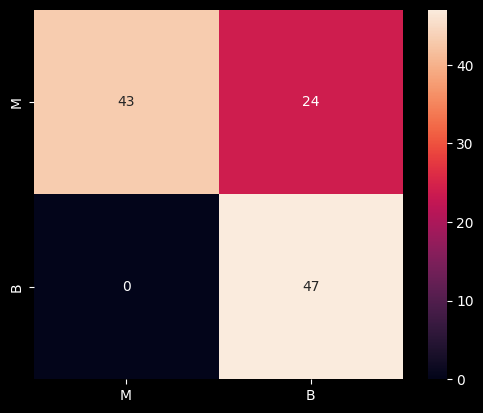

In [116]:
cm = confusion_matrix(y_test, y_pred17)
%matplotlib inline
# Plot confusion matrix
class_names = ['M','B']
df_cm = pd.DataFrame(cm, index = [i for i in class_names], columns = [i for i in class_names])
sns.heatmap(df_cm, annot = True)
cmap = plt.cm.Blues
plt.imshow(cm, interpolation = 'nearest', cmap = cmap)

# Model Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred17)
print("Model Accuracy =",acc*100,"%")